# 1)- Présentation du Projet

L'achat d'une assurance auto peut être une tâche ardue et nous voulons comprendre comment l'état civil influence la décision d'une personne d'acheter une assurance auto à la suite d'un appel téléphonique.

Ceci est un jeu de données d'une banque aux États-Unis. Outre les services habituels, cette banque fournit également des services de carassurance. La banque organise régulièrement des campagnes pour attirer de nouveaux clients. La banque dispose de données sur les clients potentiels. 

Les employés de la banque les appellent pour faire de la publicité pour les options d’assurance auto disponibles. 

Plisieurs informations générales sur les clients sont fournies(âge, emploi,,mariés, célibataires ou divorcés, etc.) ainsi que des informations plus spécifiques sur la campagne de vente d’assurance en cours (communication, dernier jour de contact) et les campagnes précédentes (attributs tels que tentatives précédentes, résultat d'appel si les clients ont souscrit ou non une assurance automobile à la suite de l'appel.).

Le jeu de données contient des données de 5000 clients ayant reçu des appels pour leur proposer des services d'assurance automobile. 

# 2)- Problème à résoudre


La banque souhaite utiliser les données sur ces clients potentiels en les appelant, en leur proposant ces service d'assurances automobile, afin de pouvoir y travailler et améliorer son activité. 

Le problème que je tente de résoudre implique des modèles prédictifs et le choix du meilleur modèle parmi ceux-ci. utiliser des techniques de validation de modèle pour mieux comprendre les facteurs clés qui contribuent au succès de ces appels et fournir des une solution pour améliorer également ces résultats. 

En outre, la mise en œuvre du modèle prédictif peut améliorer leurs activités et les aider à se concentrer sur les domaines clés de leur succès.

# 3)- Tableau du jeu de données

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Voici les caractéristiques du jeu de données et la  description de chaque attribut / caractéristique ainsi, indique si les variables sont continues, catégoriques ou binaires..</span>

|Feature          | Description                                                           | Example                            |
|:----------------|:----------------------------------------------------------------------|:-----------------------------------|
|Id               | *ID Unique                                                            | de 1  … 5000 (taille du dataset)   |
|Age              | *Age du client                                                        |                                    |
|Job              | *Job du client                                                        | "admin.", "blue-collar", etc.      |
|Marital          | *Status matrimonial du client                                         | "divorced", "married", "single"    |
|Education        | *Niveau d'éducation du client                                         | "primary", "secondary", etc.       |
|Default          | *Le client a un credit par default?                                   | "yes" - 1,"no" - 0                 |
|Balance          | *Solde annuel moyen, en USD                                           |                                    |
|HHInsurance      | *Le ménage est-il assuré?                                             | "yes" - 1,"no" - 0                 |
|CarLoan          | *Le client a-t-il un prêt auto ?                                      | "yes" - 1,"no" - 0                 | 
|Communication    | *Type de communication de contact                                     | "cellular", "telephone", “NA”      |
|LastContactMonth | *Le mois du dernier contact                                           | "jan", "feb", etc.                 |
|LastContactDay   | *Le jour du dernier contact                                           |                                    |
|CallStart        | *Heure de début du dernier appel (HH:MM:SS)                           | 12:43:15                           |
|CallEnd          | *Heure de fin du dernier appel (HH:MM:SS)                             | 12:43:15                           |
|NoOfContacts     | *Nombre de contacts effectués lors de cette campagne pour ce client   |                                    |
|DaysPassed       | *Nombre de jours écoulés après le dernier contact du client d'une     |                                    |
|                 | campagne précédente (numérique; -1 signifie que le client n'a pas     |                                    |
|                 |   encore été contacté).                                               |                                    | 
|PrevAttempts     | *Nombre de contacts établis avant cette campagne et pour ce client    |                                    |
|Outcome          | *résultat de la campagne marketing précédente                         | "failure", "other", "success", “NA”|
|CarInsurance     | *Le client a-t-il souscrit une Assurance Auto?                        | "yes" - 1,"no" - 0                 |

# 4)- Exploration des données

In [92]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import tree

- Choisir l'ID de l'appel comme index des données à importer

In [2]:
# Reading Csv file
path='./data/'
df = pd.read_csv(path+'carInsurance_train.csv', encoding='utf8', sep=',')
df.set_index('Id')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0


In [3]:
df.shape

(4000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


- Séries Numériques

In [5]:
# Columns in dataset
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [6]:
# Statistics of numerical columns
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


En remarquant que queklques colonnes Numériques, ont des valeurs binaires ayant 0 'et 1'

In [7]:
# Datatypes of columns in dataset
df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

- Séries Catégoriques

In [8]:
df.select_dtypes(include=['object']).head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


In [9]:
# Statistics of categorical features
df.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:48:27,11:27:46
freq,893,2304,1988,2831,1049,437,3,3


In [10]:
df.select_dtypes(include=['int64','float64']).head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


In [11]:
df.describe(include=['int64','float64'])

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


# Valeurs Manquantes

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
Les valeurs manquantes sont une préoccupation majeure dans l’analyse des données.
De plus, les modèles prédictifs ne peuvent être construits sans traiter les valeurs manquantes.</span>



In [12]:
#Chercher les valeurs manquantes
df.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

# Visualisation Univariée

In [13]:
attributs_numeriques = df.select_dtypes(include=['int64','float64'])


In [14]:
attributs_numeriques[0:5]

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C0F43E1D0>,
      dtype=object)

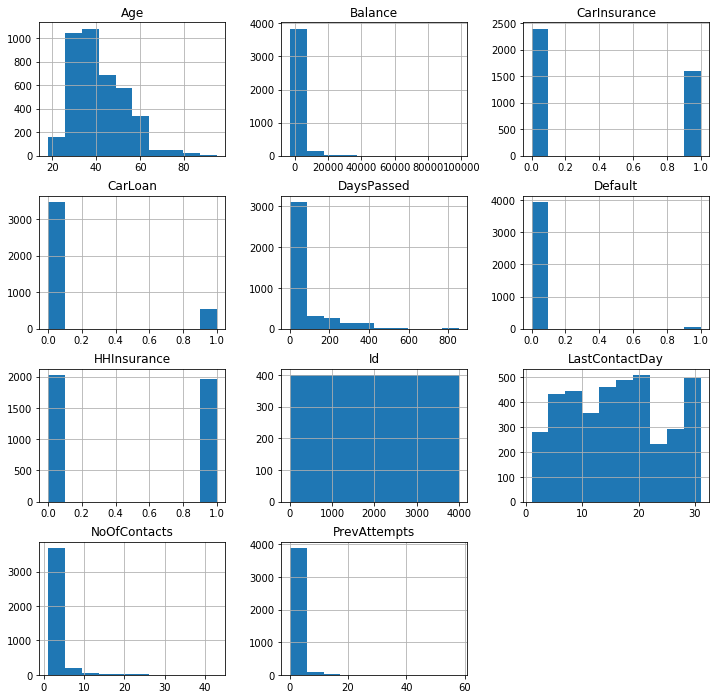

In [15]:
attributs_numeriques.hist(figsize=(12,12))

In [16]:
attributs_categoriques = df.select_dtypes(include=['object'])


In [17]:
attributs_categoriques[0:5]

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


# **************************************************************************************
# **************************************************************************************

# II) - Livrable 02: Analyse / Visualisation Univariée et bivariée

# II) - a/ Analyse / Visualisation Univariée

In [18]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Age'].value_counts())

31    182
32    177
33    164
34    163
35    157
36    154
30    145
37    140
38    130
39    126
29    113
43    109
40    106
45    105
46    105
41    104
27    102
47     94
42     94
44     92
49     90
48     89
28     89
52     79
57     77
51     77
58     73
56     72
53     72
26     69
     ... 
62     18
63     15
64     13
21     12
77     10
67      9
72      9
75      9
80      9
73      9
69      9
19      9
70      8
20      8
65      7
18      6
66      6
68      5
71      4
78      4
76      4
79      3
81      3
86      2
82      2
83      2
95      1
84      1
87      1
92      1
Name: Age, Length: 70, dtype: int64


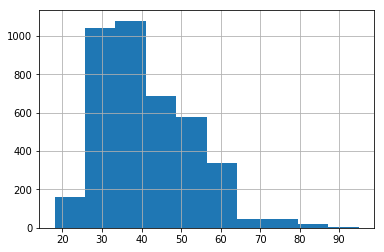

In [19]:
df['Age'].hist()

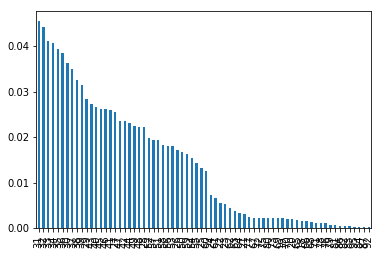

In [20]:
df['Age'].value_counts(normalize=True).plot(kind='bar')

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64
**************************************************


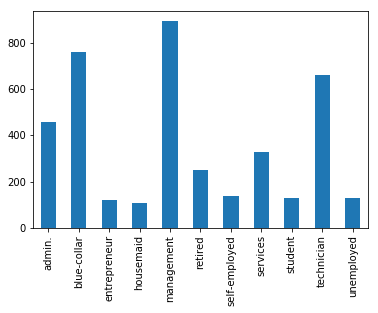

In [21]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



married     2304
single      1213
divorced     483
Name: Marital, dtype: int64
**************************************************


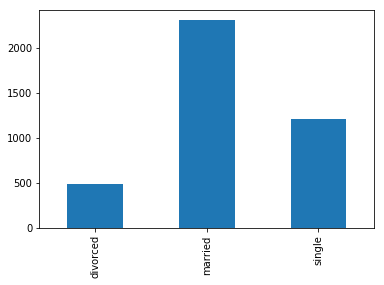

In [22]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Marital'].value_counts())
print ("*"*50)
df['Marital'].value_counts().sort_index().plot.bar()



secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64
**************************************************


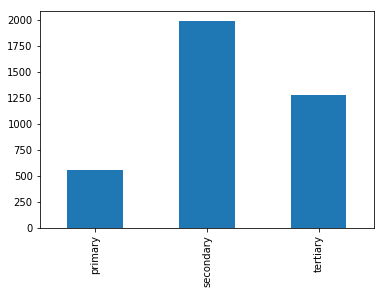

In [23]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Education'].value_counts())
print ("*"*50)
df['Education'].value_counts().sort_index().plot.bar()



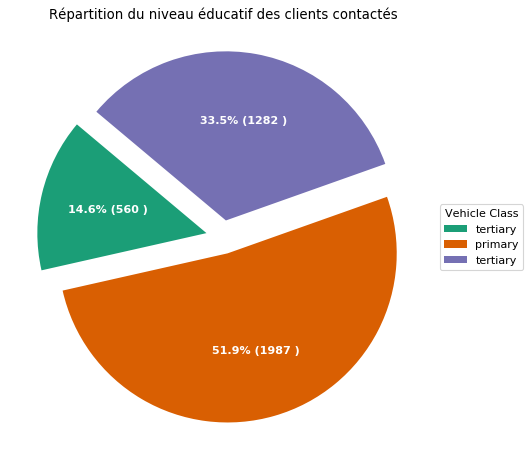

In [24]:
# Présentation avec un graphe camembert
df4 = df.groupby('Education').size().reset_index(name='counts')
# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df4['counts']
categories = df['Education']
explode = [0.1,0.1,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140, explode=explode)

# graphique
ax.legend(wedges, categories, title="Education level", loc="center left", bbox_to_anchor=(1, 0,0.5,1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Répartition du niveau éducatif des clients contactés")
plt.show()

0    3942
1      58
Name: Default, dtype: int64
**************************************************


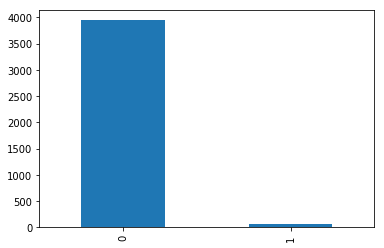

In [25]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Default'].value_counts())
print ("*"*50)
df['Default'].value_counts().sort_index().plot.bar()



0    2029
1    1971
Name: HHInsurance, dtype: int64
**************************************************


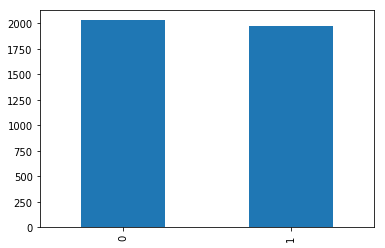

In [27]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['HHInsurance'].value_counts())
print ("*"*50)
df['HHInsurance'].value_counts().sort_index().plot.bar()



0    3468
1     532
Name: CarLoan, dtype: int64
**************************************************


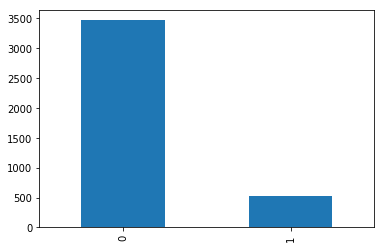

In [28]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['CarLoan'].value_counts())
print ("*"*50)
df['CarLoan'].value_counts().sort_index().plot.bar()



cellular     2831
telephone     267
Name: Communication, dtype: int64
**************************************************


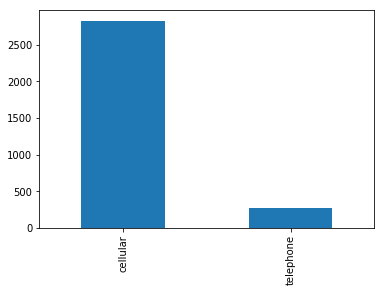

In [29]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Communication'].value_counts())
print ("*"*50)
df['Communication'].value_counts().sort_index().plot.bar()



18    203
20    196
13    171
30    167
15    165
17    163
8     158
19    158
7     157
21    156
5     152
12    150
6     145
29    142
2     138
4     136
28    136
11    135
9     129
14    127
16    125
27    102
26     98
25     94
3      93
23     89
22     88
10     72
24     54
31     52
1      49
Name: LastContactDay, dtype: int64
**************************************************


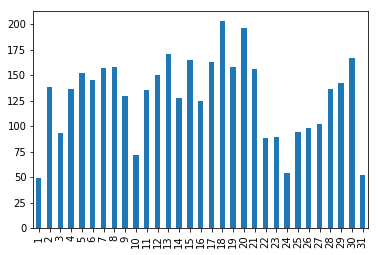

In [30]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['LastContactDay'].value_counts())
print ("*"*50)
df['LastContactDay'].value_counts().sort_index().plot.bar()



may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: LastContactMonth, dtype: int64
**************************************************


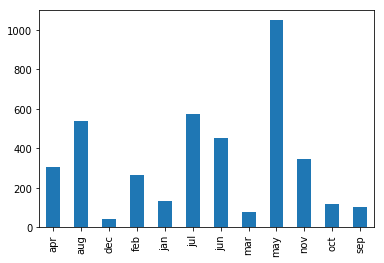

In [31]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['LastContactMonth'].value_counts())
print ("*"*50)
df['LastContactMonth'].value_counts().sort_index().plot.bar()



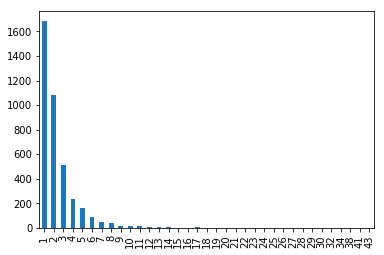

In [32]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
#print (df['NoOfContacts'].value_counts())
df['NoOfContacts'].value_counts().sort_index().plot.bar()



**************************************************


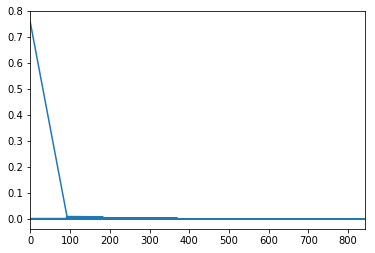

In [33]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
#print (df['DaysPassed'].value_counts())
print ("*"*50)
#df['DaysPassed'].value_counts().sort_index().plot.bar()
df['DaysPassed'].value_counts(normalize=True).plot(kind='line')


management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64
**************************************************


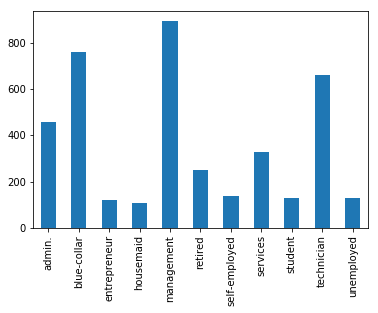

In [34]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
14       5
12       5
13       4
19       4
11       3
23       1
18       1
58       1
30       1
Name: PrevAttempts, dtype: int64
**************************************************


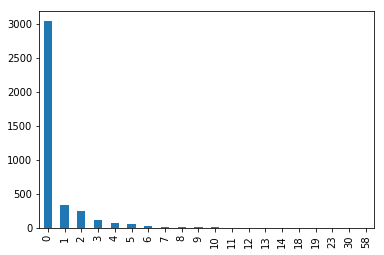

In [35]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['PrevAttempts'].value_counts())
print ("*"*50)
df['PrevAttempts'].value_counts().sort_index().plot.bar()



failure    437
success    326
other      195
Name: Outcome, dtype: int64
**************************************************


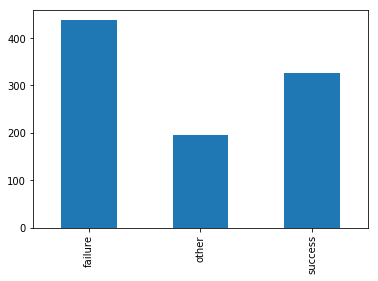

In [36]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Outcome'].value_counts())
print ("*"*50)
df['Outcome'].value_counts().sort_index().plot.bar()



management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64
**************************************************


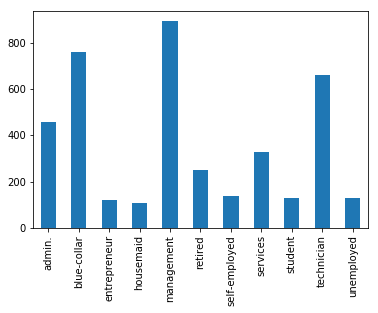

In [37]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



0    2396
1    1604
Name: CarInsurance, dtype: int64
**************************************************


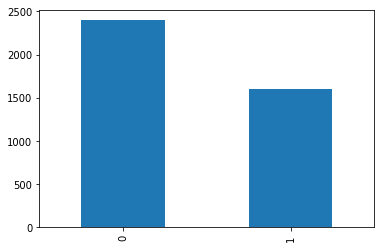

In [38]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['CarInsurance'].value_counts())
print ("*"*50)
df['CarInsurance'].value_counts().sort_index().plot.bar()



# II) - b/ Analyse / Visualisation Bivariée

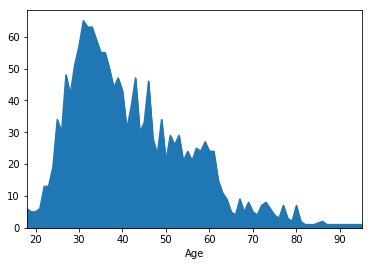

In [39]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['CarInsurance'].sum().plot(kind='area')

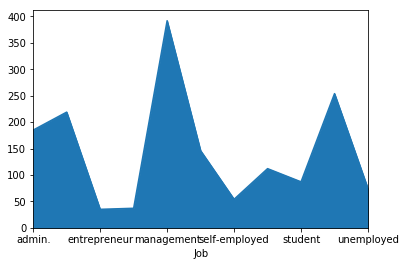

In [40]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Job')['CarInsurance'].sum().plot(kind='area')

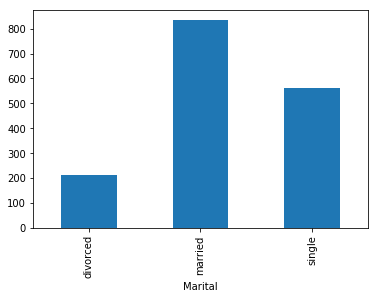

In [41]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Marital')['CarInsurance'].sum().plot(kind='bar')

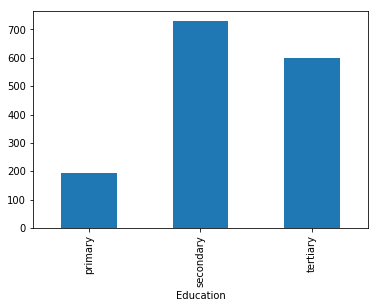

In [42]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Education')['CarInsurance'].sum().plot(kind='bar')

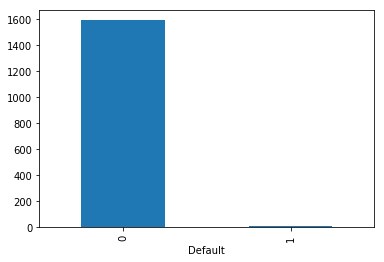

In [43]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Default')['CarInsurance'].sum().plot(kind='bar')

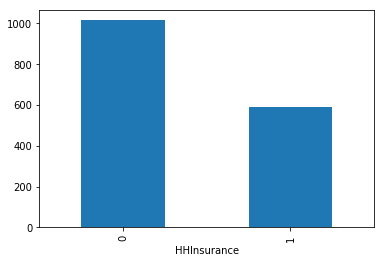

In [44]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('HHInsurance')['CarInsurance'].sum().plot(kind='bar')

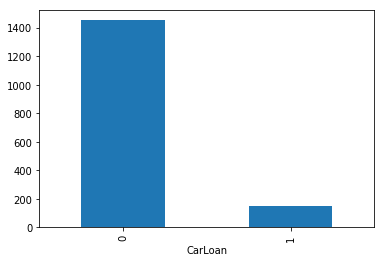

In [45]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CarLoan')['CarInsurance'].sum().plot(kind='bar')

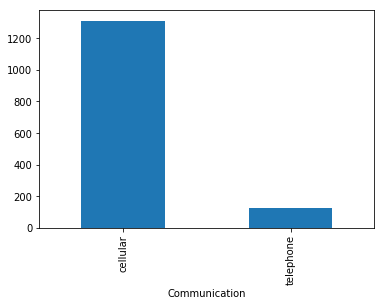

In [46]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Communication')['CarInsurance'].sum().plot(kind='bar')

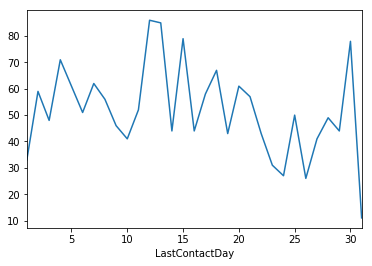

In [47]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('LastContactDay')['CarInsurance'].sum().plot(kind='line')

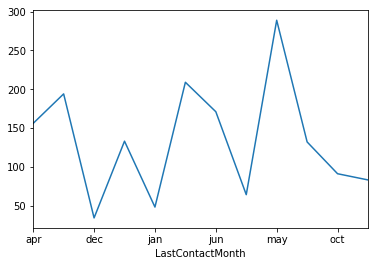

In [48]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('LastContactMonth')['CarInsurance'].sum().plot(kind='line')

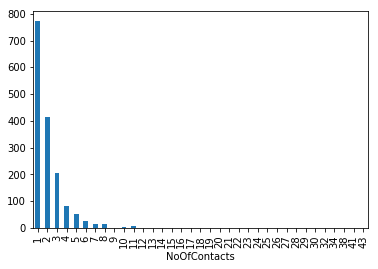

In [49]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('NoOfContacts')['CarInsurance'].sum().plot(kind='bar')

CarInsurance
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DaysPassed, dtype: object

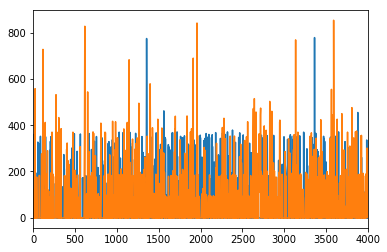

In [50]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CarInsurance')['DaysPassed'].plot(kind='line')

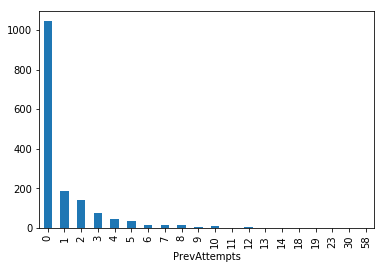

In [51]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('PrevAttempts')['CarInsurance'].sum().plot(kind='bar')

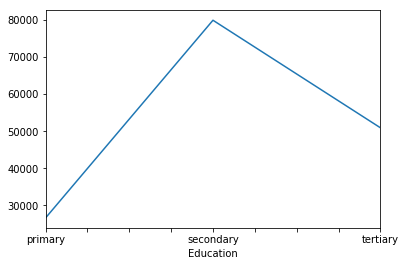

In [52]:
df.groupby('Education')['Age'].sum().plot(kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


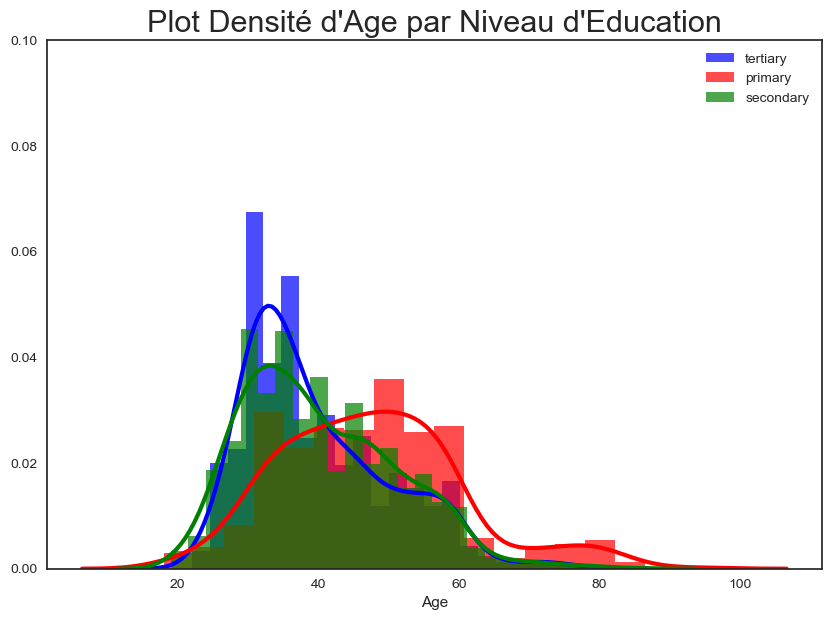

In [133]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

plt.figure(figsize=(10,7), dpi= 100)
sns.distplot(df.loc[df['Education'] == 'tertiary',"Age"], color="blue", label="tertiary", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Education'] == 'primary',"Age"], color="red", label="primary", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Education'] == 'secondary', "Age"], color="green", label="secondary", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.10)

# Decoration
plt.title("Plot Densité d'Age par Niveau d'Education", fontsize=22)
plt.legend()
plt.show()

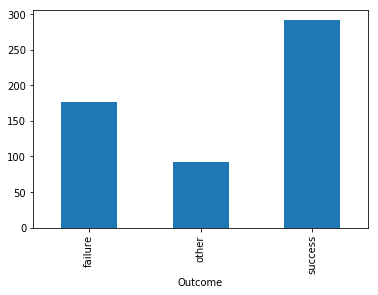

In [54]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Outcome')['CarInsurance'].sum().plot(kind='bar')

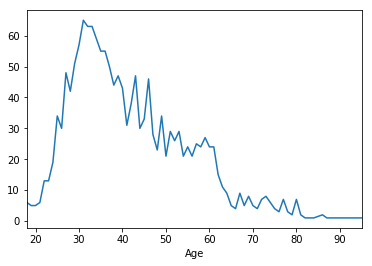

In [59]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['CarInsurance'].sum().plot(kind='line')

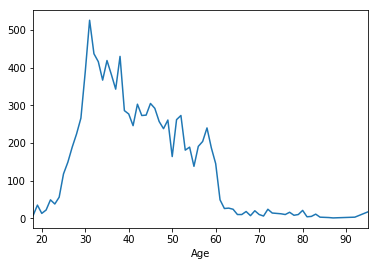

In [60]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['NoOfContacts'].sum().plot(kind='line')

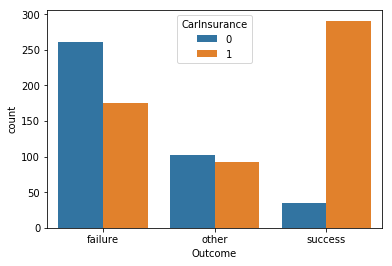

In [61]:
#résultats des campagnes précédentes
sns.countplot(x="Outcome",hue='CarInsurance',data=df);

In [62]:
df['Education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

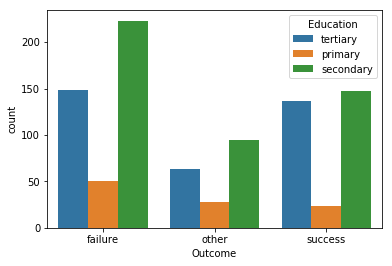

In [63]:
#résultats des campagnes précédentes selon l niveau d'éducation
sns.countplot(x="Outcome",hue='Education',data=df);

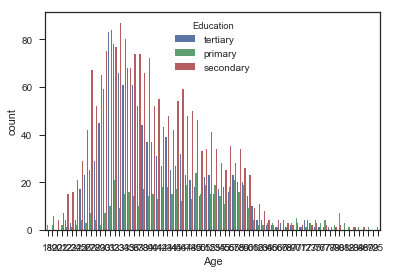

In [113]:
#résultats des campagnes précédentes
sns.countplot(x="Age",hue='Education',data=df);

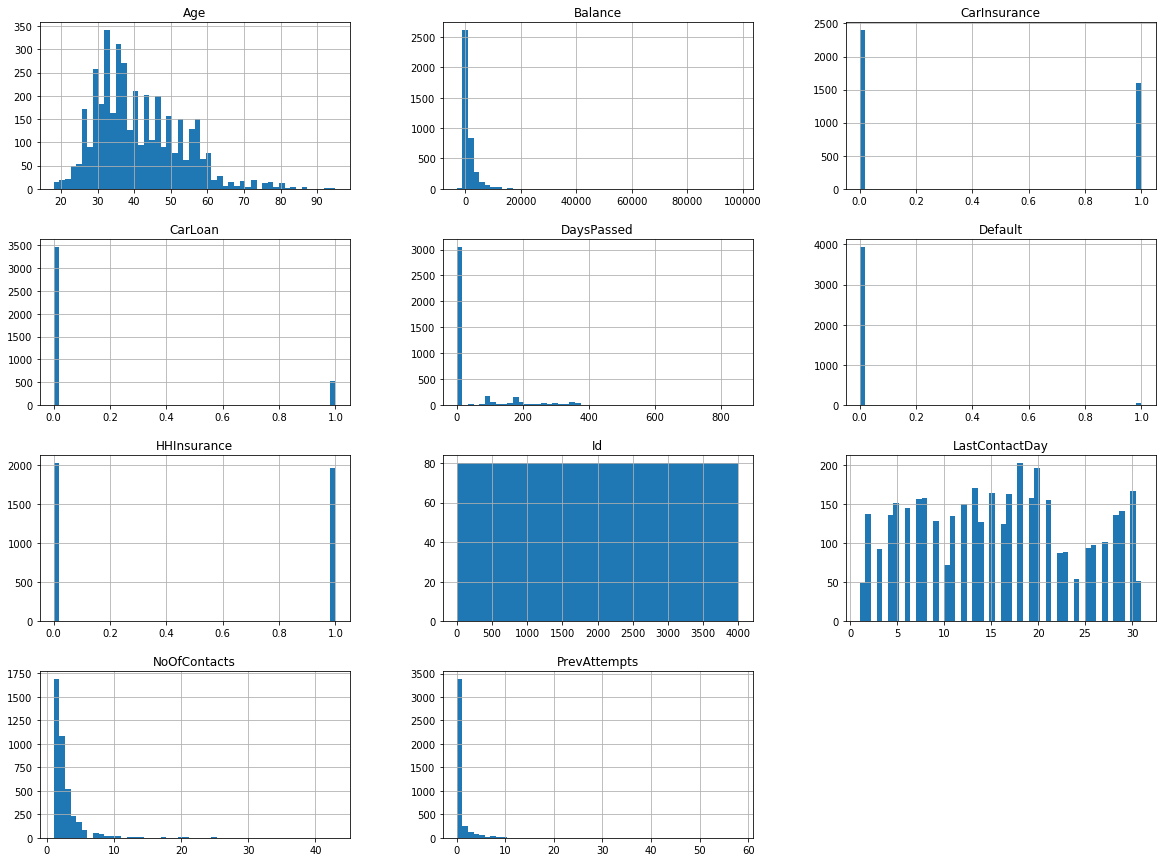

In [81]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Matrice de Corrélation:

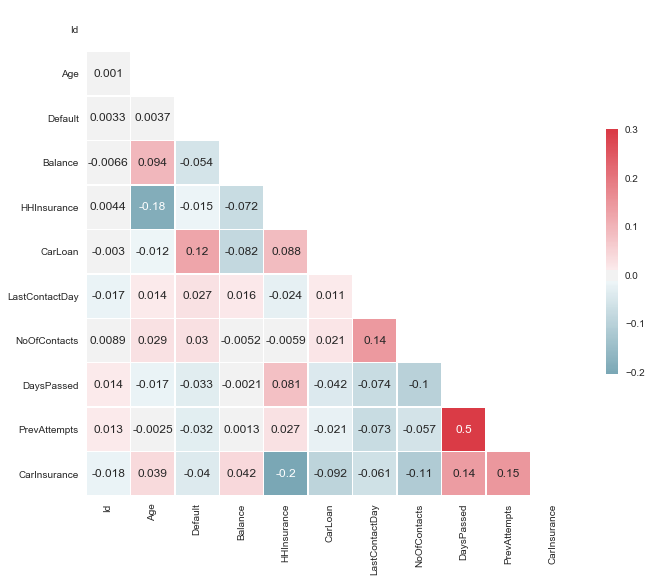

In [121]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# MAtrice Chaleur

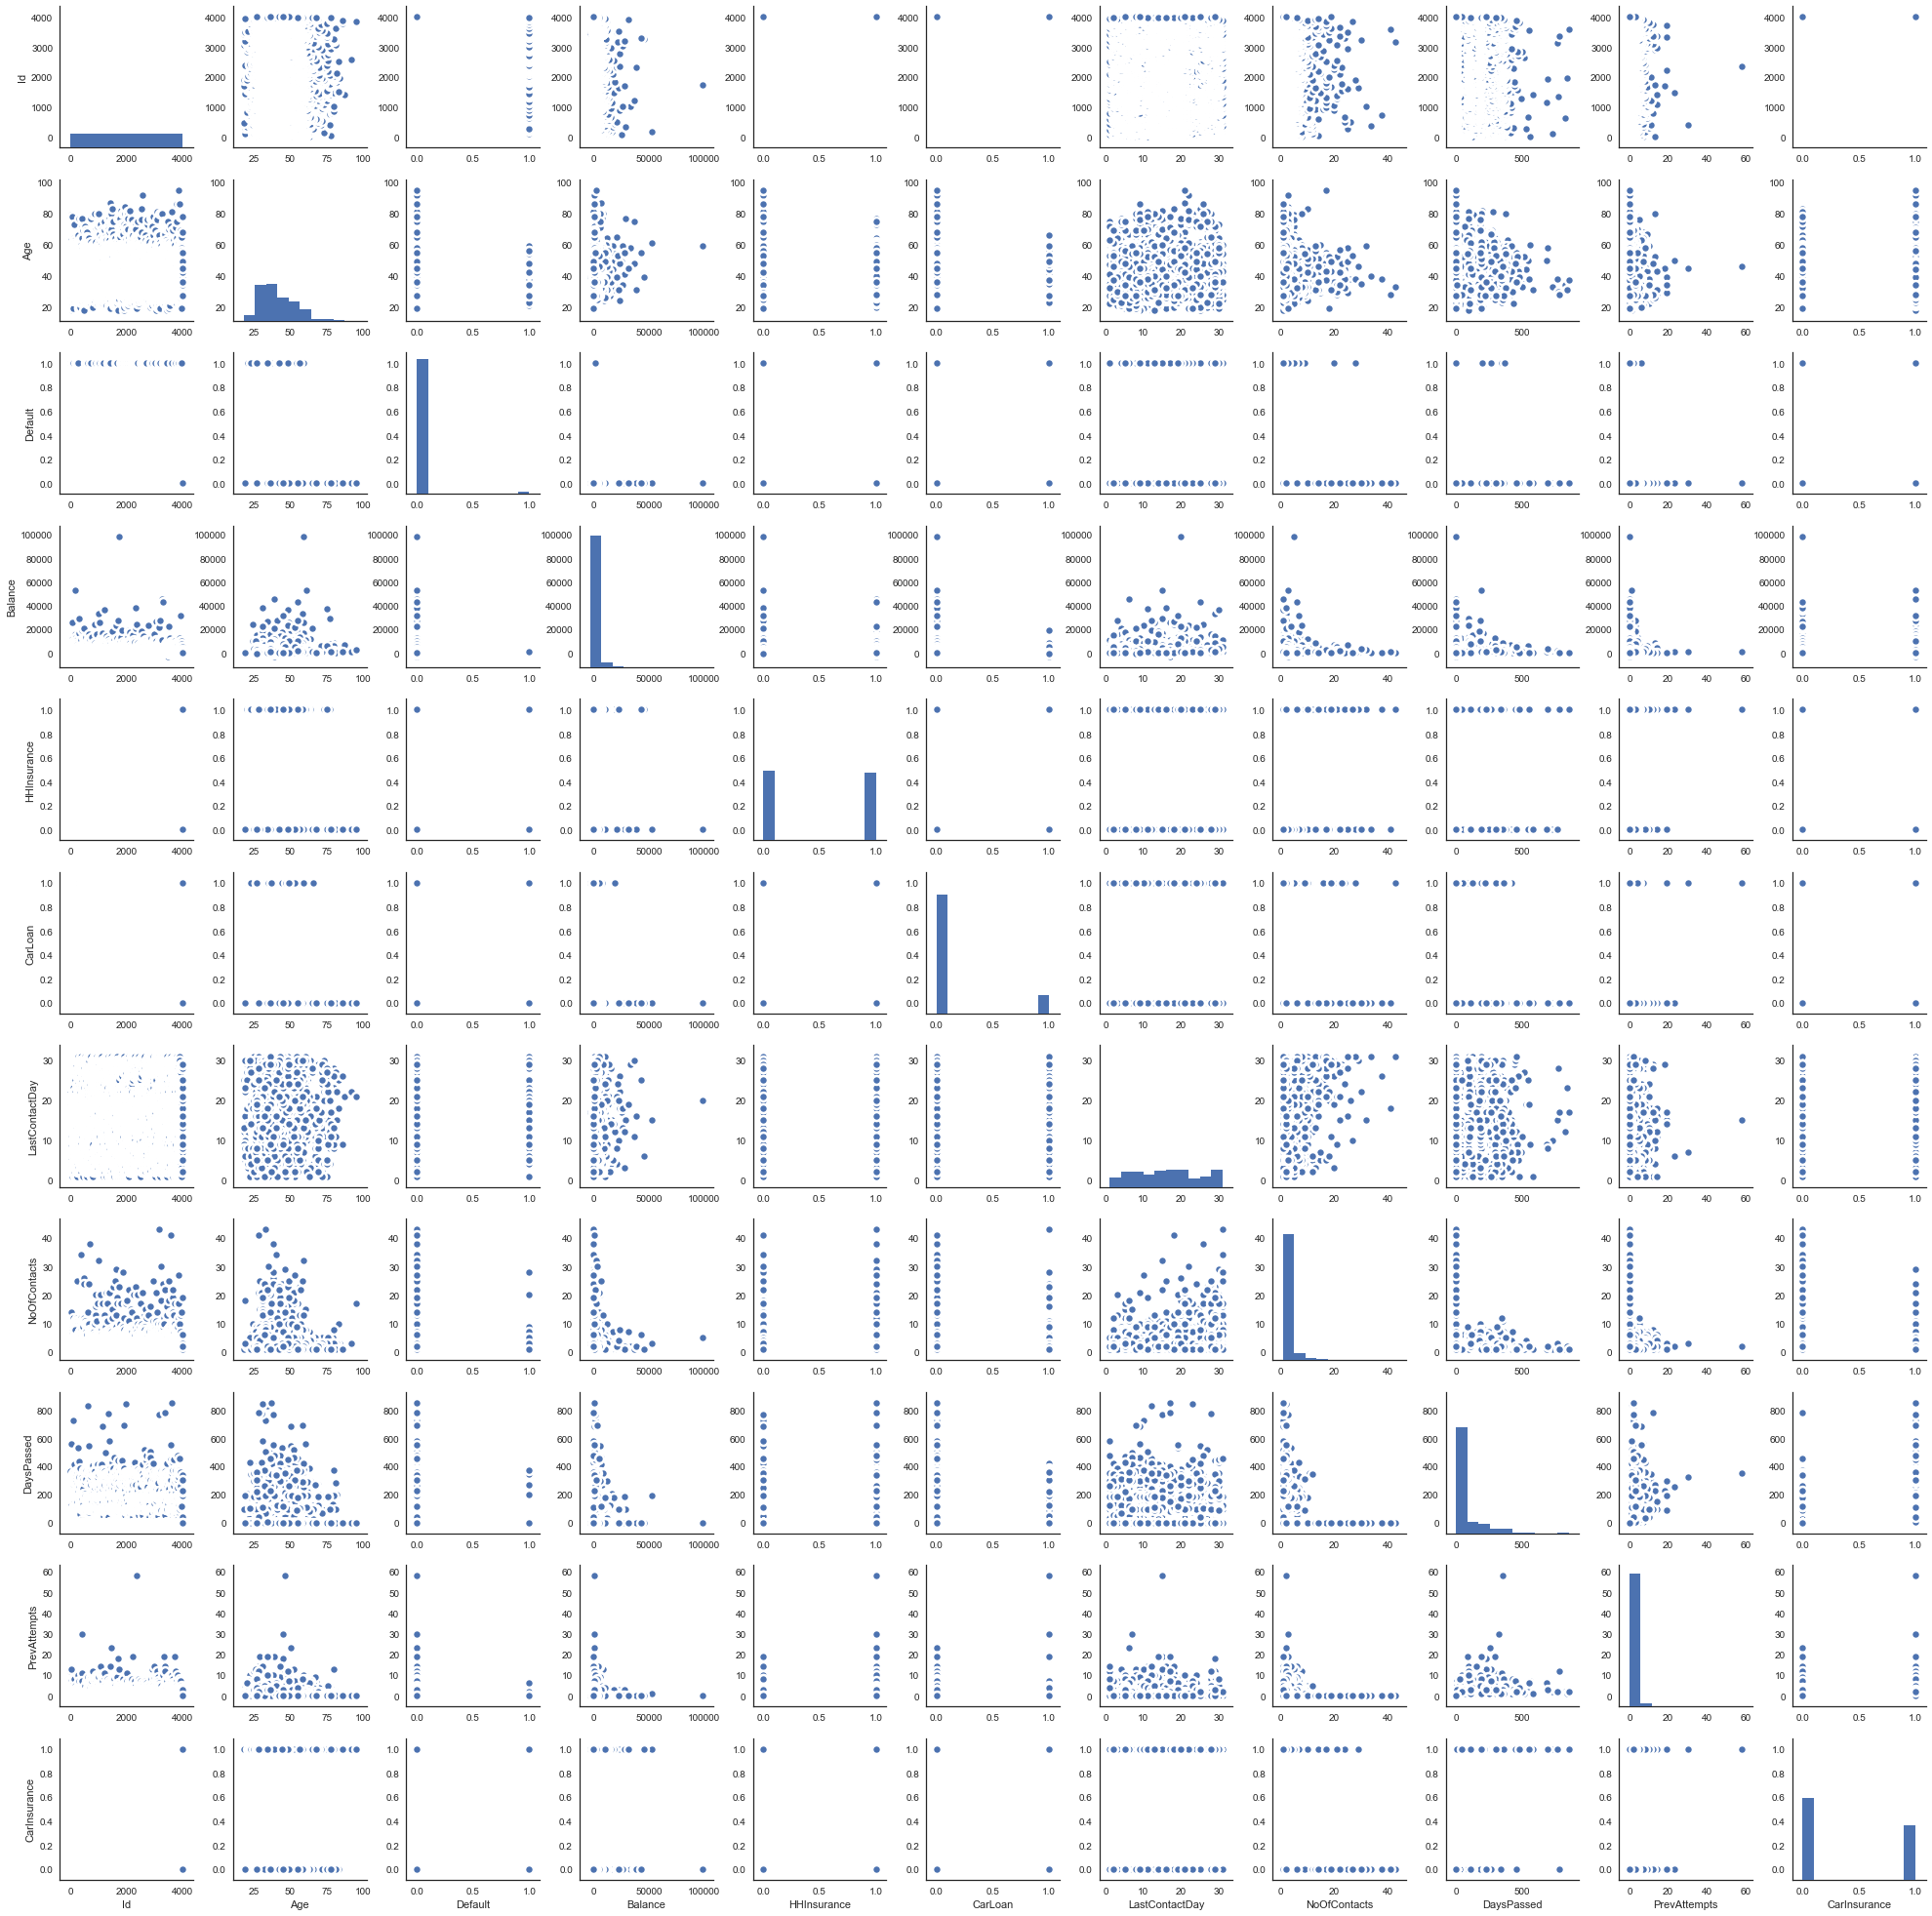

In [122]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Les attributs sont assez indépendantes, à l'exception de DaysPassed et PreAttempts. Le succès des appels à froid est en corrélation positive avec PreAttemps, DaysPassed, Age et Balance,  et en corrélation négative avec défaut, HHInsurance, CarLoan, LastContactDay et NoOfContacts.

#### RÉSULTATS APRES VISUALISATION DE DONNÉES
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
La visualisation est un aspect important de Data Science sans lequel il est assez difficile de parvenir à un résultat. Même si le résultat est déterminé par des tableaux, l'analyse de chaque valeur et sa conclusion sont pénibles. Les graphiques / graphiques sont très utiles pour accomplir ces tâches facilement, même à une personne non technique. Les cadres et les gestionnaires aiment regarder un rapport avec la visualisation afin de pouvoir facilement prendre des décisions complexes.Bowow est une représentation en paire qui couple les champs d’intérêt et les trace. Les variables de la représentation en paire sont sélectionnées dans la carte thermique, ce qui a une incidence sur les résultats.

**Points à retenir depuis la matrice de corrélation:**

* Les personnes âgées sont plus susceptibles de souscrire une assurance auto.
* Les personnes ayant déjà souscrit une assurance automobile ou une assurance habitation sont moins susceptibles d’acheter.
* Les gens donnent un signe positif si les jours passent (le temps avant qu'ils aient été contactés) augmente.
* Lorsque vous contactez fréquemment des personnes, leur tendance d'achat augmente après 20 contacts ou plus.
* Le nombre de contacts et de tentatives précédentes fonctionne de la même manière, plus il est avantageux d’augmenter l’achat d’assurance automobile.
 </span>

# PRETRAITEMENT DES DONNÉES 

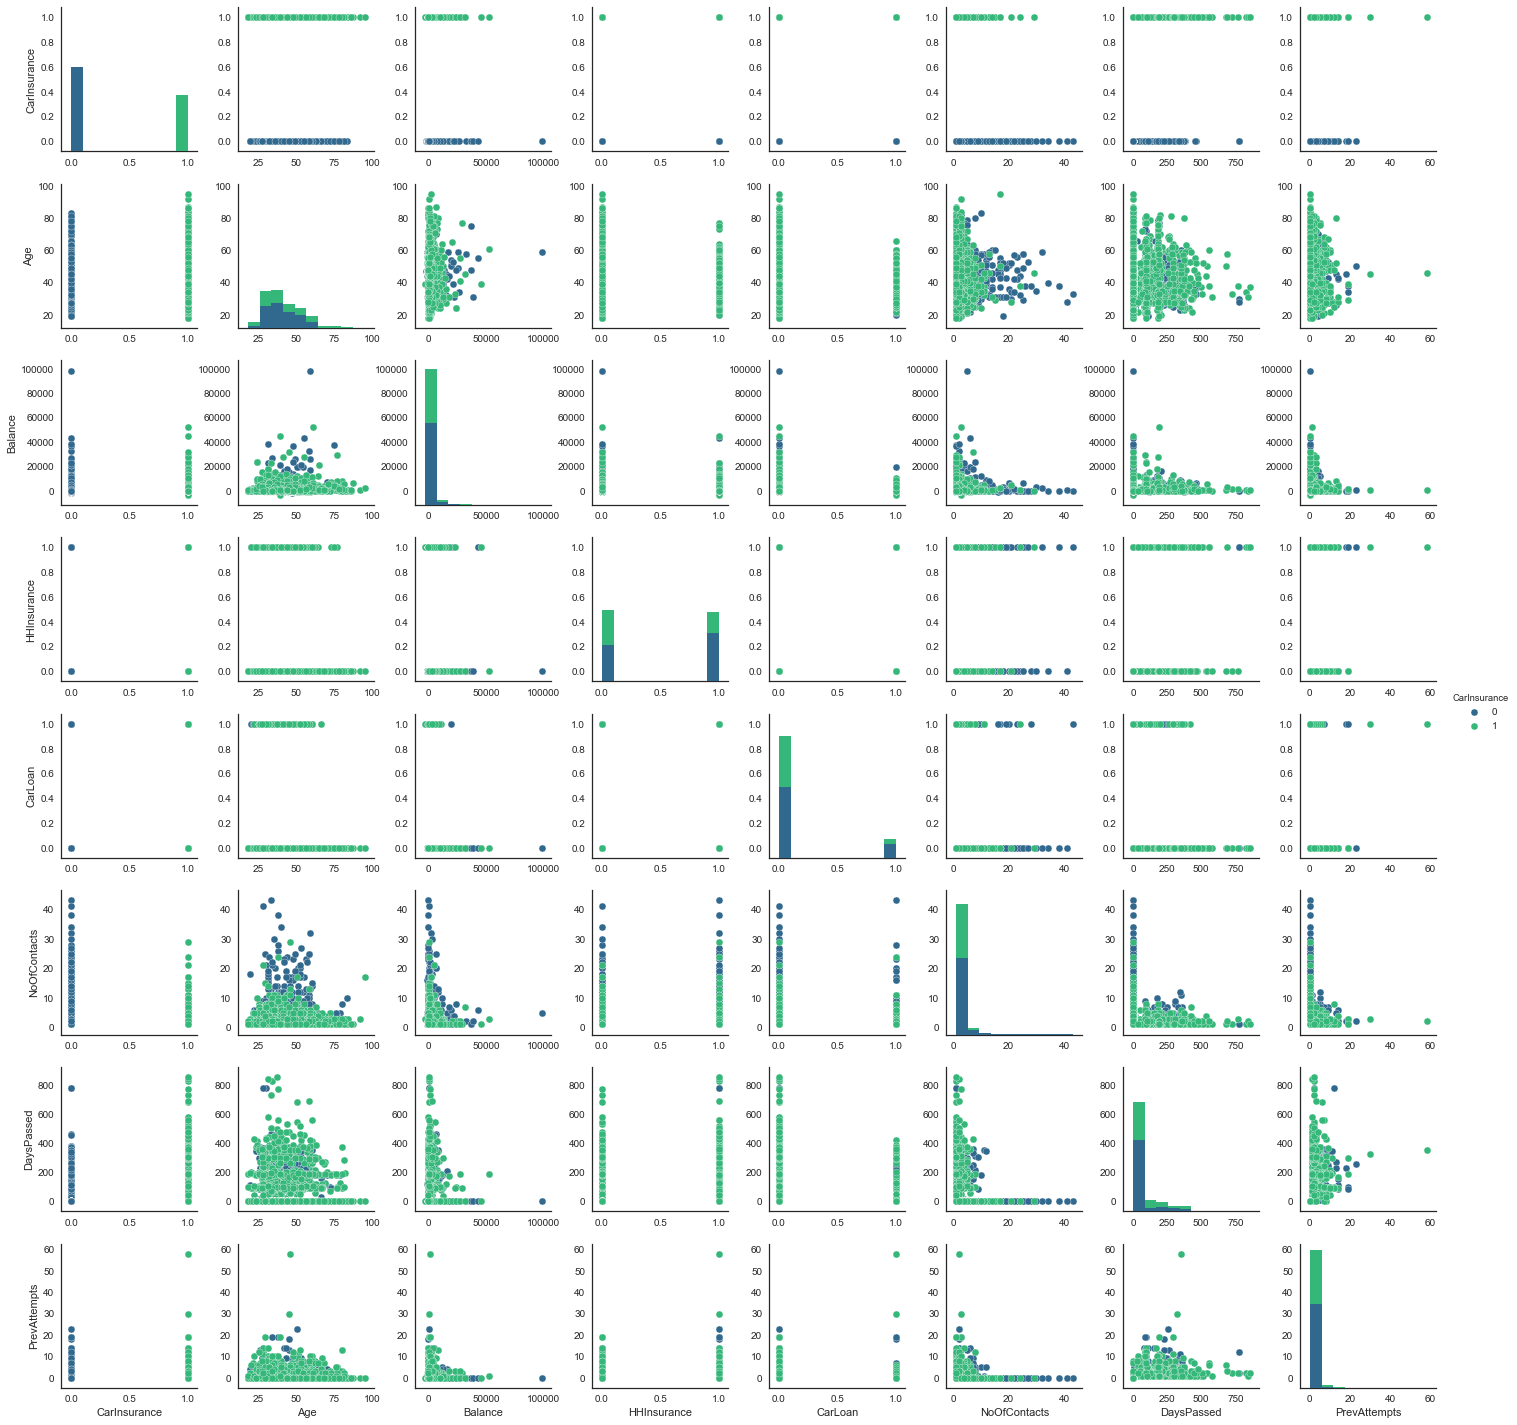

In [123]:
# features importants 
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(df[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

Cette visualisation nous aide à visualiser les relations entre les variables CarInsurance, Balance et Categoriques telles que l’éducation, l’état matrimonial et l’emploi.
<br><b>Âge:</b> Il est intéressant de voir que les personnes âgées sont plus susceptibles de souscrire une assurance auto.
<br><b>Balance:</b> pour le solde, le point de données dans le coin supérieur droit peut être une valeur aberrante
<br><b>HHInsurance:</b> les ménages assurés sont moins susceptibles de souscrire une assurance auto
<br><b>CarLoan:</b> les personnes avec un prêt auto ont moins tendance à acheter
<br><b>NoOfContacts:</b> trop de contacts sont à l'origine de l'attrition de la clientèle
<br><b>DaysPassed:</b> Il semble que plus le jour s'est écoulé depuis le dernier contact, mieux c'est.
<br><b>PrevAttempts:</b> En outre, plus de tentatives précédentes, moins susceptibles d'acheter. Il y a une valeur aberrante ici


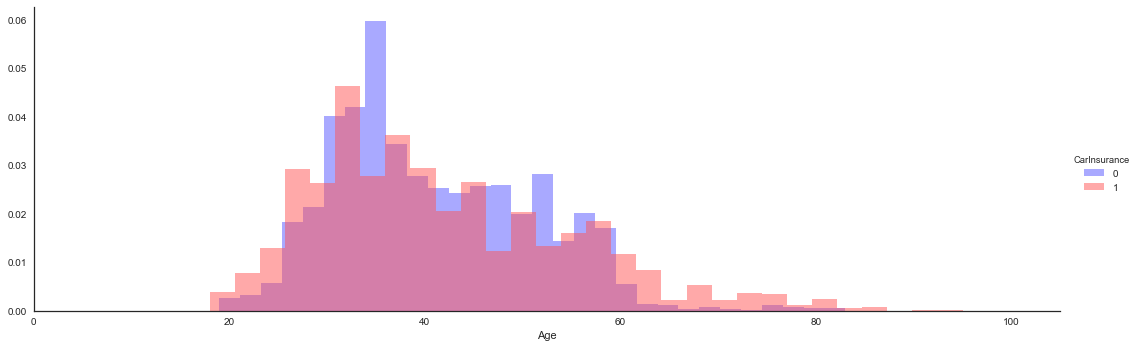

In [124]:
# Regardons plus prés l'Age
facet = sns.FacetGrid(df, hue='CarInsurance',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,normed=True)
facet.set(xlim=(0,df.Age.max()+10))
facet.add_legend()


Il semble que les jeunes (<= 30 ans) et les personnes âgées sont plus susceptibles de souscrire une assurance auto auprès de cette banque.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


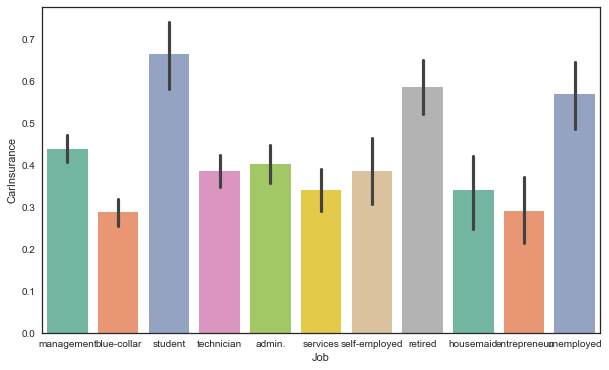

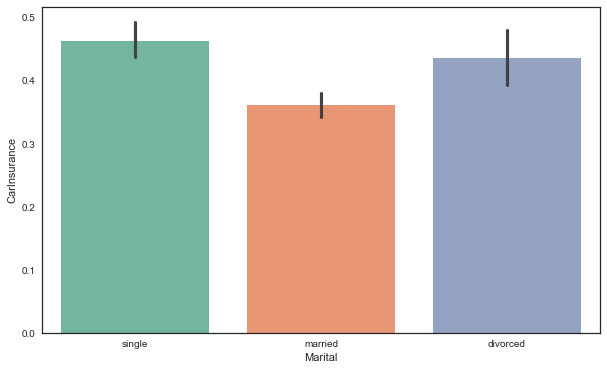

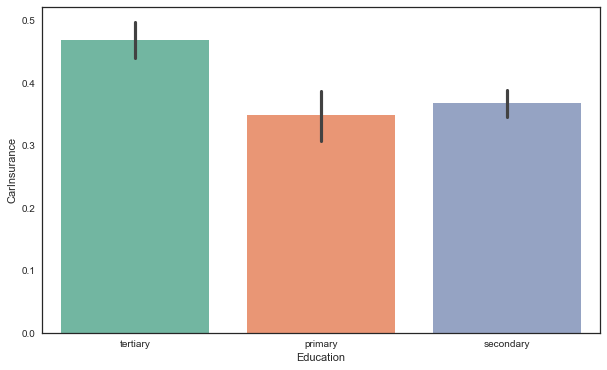

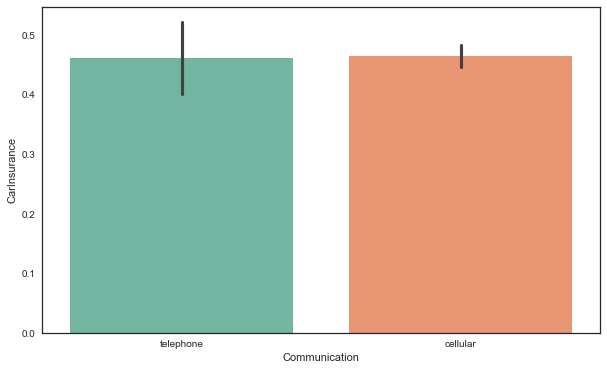

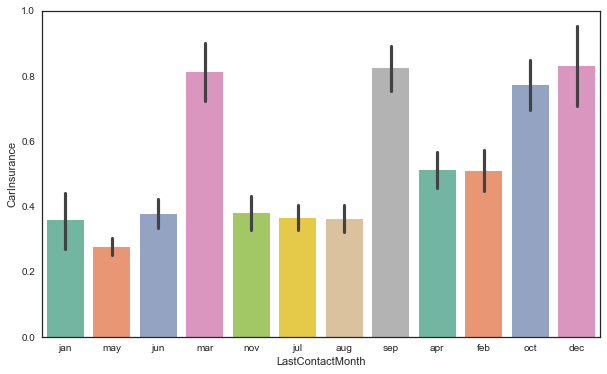

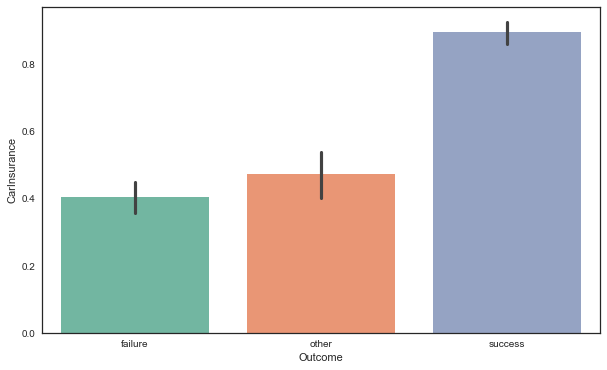

In [125]:
# Regardons plus prés les feaures categoriques
cat_feats = df.select_dtypes(include=['object']).columns
plt_feats = cat_feats[(cat_feats!= 'CallStart') & (cat_feats!='CallEnd')]

for feature in plt_feats:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance', data=df,palette='Set2') 


<br><b>Job:</b> les étudiants sont les plus susceptibles de souscrire une assurance, suivis par les retraités et les chômeurs. Ceci correspond à la répartition par âge. Il pourrait y avoir une promotion ciblant les étudiants.
<br><b>Marital:</b> les personnes mariées sont moins susceptibles de souscrire une assurance auto. Possibilités de développement des activités d’assurance familiale
<br><b>Education:</b> les personnes ayant une éducation supérieure sont plus susceptibles d'acheter
<br><b>Communication:</b> Pas de grande différence entre cellulaire et téléphone
<br><b>Outcome de la campagne précédente:</b> le succès de la campagne marketing précédente est largement associé au succès de cette campagne
<br><b>ContactMonth:</b> mars, septembre, octobre et décembre sont les mois les plus chauds. Cela pourrait être associé à la saison scolaire.

# Table Pivot

In [126]:
#df_pivot = df.pivot_table(values = 'Balance', columns = 'Outcome', index = ['Marital', 'Communication','CarInsurance'])

df_pivot = df.pivot_table(values = 'CarLoan', columns = 'LastContactMonth', index = ['Marital','Education','CarInsurance'], aggfunc='sum')


In [127]:
df_pivot

LastContactMonth                 apr   aug  dec  feb  jan   jul   jun  mar  \
Marital  Education CarInsurance                                              
divorced primary   0             0.0   0.0  0.0  0.0  0.0   6.0   0.0  0.0   
                   1             0.0   0.0  NaN  0.0  0.0   0.0   0.0  0.0   
         secondary 0             2.0   2.0  0.0  1.0  1.0  10.0   0.0  NaN   
                   1             0.0   1.0  0.0  2.0  0.0   4.0   0.0  1.0   
         tertiary  0             0.0   2.0  NaN  0.0  2.0   3.0   1.0  0.0   
                   1             0.0   0.0  0.0  0.0  0.0   1.0   0.0  0.0   
married  primary   0             3.0   4.0  NaN  1.0  1.0  11.0   5.0  0.0   
                   1             1.0   0.0  0.0  0.0  0.0   4.0   1.0  0.0   
         secondary 0             6.0  11.0  0.0  7.0  1.0  46.0  19.0  0.0   
                   1             3.0   1.0  0.0  3.0  0.0  16.0   4.0  1.0   
         tertiary  0             2.0   3.0  0.0  1.0  3.0  19.0   7.0  0.0   
                   1             1.0   4.0  0.0  3.0  0.0   3.0   4.0  0.0   
single   primary   0             0.0   0.0  NaN  0.0  0.0   1.0   0.0  NaN   
                   1             0.0   0.0  NaN  0.0  NaN   3.0   0.0  NaN   
         secondary 0             4.0   2.0  0.0  6.0  3.0  19.0   4.0  0.0   
                   1             3.0   0.0  0.0  0.0  2.0  10.0   2.0  0.0   
         tertiary  0             0.0   1.0  0.0  0.0  3.0   5.0   2.0  NaN   
                   1             2.0   4.0  0.0  1.0  0.0   3.0   0.0  0.0   

LastContactMonth                  may   nov  oct  sep  
Marital  Education CarInsurance                        
divorced primary   0              2.0   0.0  NaN  NaN  
                   1              3.0   0.0  0.0  0.0  
         secondary 0              4.0   2.0  2.0  0.0  
                   1              3.0   2.0  2.0  0.0  
         tertiary  0              1.0   1.0  NaN  0.0  
                   1              1.0   0.0  0.0  0.0  
married  primary   0              8.0   4.0  NaN  0.0  
                   1              3.0   1.0  0.0  0.0  
         secondary 0             44.0  16.0  0.0  0.0  
                   1             10.0   4.0  1.0  0.0  
         tertiary  0             11.0  11.0  0.0  0.0  
                   1              5.0   1.0  0.0  0.0  
single   primary   0              3.0   1.0  NaN  NaN  
                   1              2.0   1.0  NaN  NaN  
         secondary 0             17.0   2.0  0.0  0.0  
                   1             13.0   1.0  2.0  1.0  
         tertiary  0              5.0   3.0  1.0  0.0  
                   1              4.0   0.0  1.0  0.0